# Ex03 - Histograma e Transformações de intensidade

Esta atividade tem 2 objetivos principais: 
    - entender o conceito de histograma e estatísticas da imagem
    - explorar várias formas de transformação de intensidade dos pixels. 

## Parte 1 - Histograma

Leia o notebook [Histograma de imagens]('05 Histograma da imagem.ipynb') para entender o conceito de histograma. Além da contagem dos pixels, outras estatísticas podem ser interessantes. Veja abaixo a função h2stats. Ela calcula várias estatísticas da imagem a partir do histograma. Porém, ela foi originalmente desenvolvida para funcionar com a função ia.histogram (antiga toolbox da disciplina).

In [4]:
def h2stats(h):
    import numpy as np
    #import ia898.src as ia

    hn = 1.0*h/h.sum() # compute the normalized image histogram
    v = np.zeros(6) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4]  = -(hn[hn>0]*np.log(hn[hn>0])).sum() # entropy
    v[5]  = np.argmax(h) # mode
    return v

Vamos agora fazer um teste, calculando o histograma usando a função np.histogram e depois calculando as estatísticas da imagem:

In [5]:
import numpy as np
f = np.array([1,1,1,0,1,2,2,2,1])
h, bins = np.histogram(f)
print('statistics =', h2stats(h))

statistics = [ 5.77777778  7.50617284 -0.51254498 -0.16094616  0.93688831  5.        ]


Os valores calculados parecem corretos? Vejamos o valor da média, por exemplo, usando a função np.mean:

In [6]:
print(np.mean(f))

1.22222222222


Porque os valores de média calculados pela h2stats (5.7777778) e pela np.mean(1.2222222222) são diferentes? Muito provavelmente o problema é a diferença entre a função ia.histogram e np.histogram. 

### Exercício 1
Pensando que gostaríamos de usar a função h2stats com a função np.histogram, descubram se há uma forma correta de usar a função np.histogram para obter os valores corretos das estatísticas sem alterar a função h2stats. Caso vocês não obtenham sucesso, alterem a função h2stats para que os cálculos fiquem corretos. Testem com arrays numéricos pequenos. Para checar se as estatísticas retornadas estão corretas, usem funções do Numpy e, eventualmente, do Scipy para confirmar (por exemplo: np.mean( ), scipy.stats.skew( )).


## Parte 2 - Transformação de Intensidade

É a categoria de funções que apenas alteram o valor do pixel aplicando-se uma função ou tabela de mapeamento. Estudem atentamente os tutoriais sobre Transformada de intensidade e sobre Equalização de histograma. O último tutorial mostra que é possível fazer a equalização da imagem utilizando também o conceito usado para construir um mosaico com tons de cinza igualmente distribuídos. 

### Exercício 2 
Exercite transformações de intensidade em uma imagem.

### Exercício 3
Veja a imagem abaixo. Escolha um valor de limiar (threshold) para separar as bolachas do fundo da imagem. Dica: Visualize o histograma da imagem para escolher o valor. Crie primeiro uma função de transformação T e depois aplique esta transformação para obter o objeto de interesse (cookies) pintados de branco e o fundo em preto.

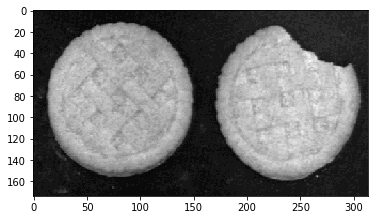

In [7]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
f = mpimg.imread('../figures/cookies.pgm')  
plt.imshow(f,cmap='gray')

### Exercício 4
Você é capaz de transformar a imagem para identificar o número da placa do carro apresentado na imagem abaixo? 

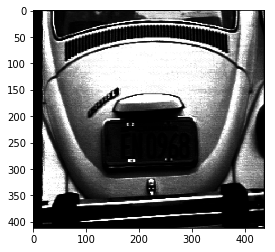

In [8]:
f = mpimg.imread('../figures/fusca.png')  
plt.imshow(f,cmap='gray')


### Exercício 5
Escreva uma função que implemente a tranformação de brilho e contraste de uma imagem em níveis de cinza, baseada na construçao de três segmentos de retas:

- Primeiro segmento de reta: 'x' de '0' a 'x1', com angulo 'alpha';
- Segundo segmento de reta: 'x' de 'x1' a 'x2', com angulo 'beta';
- Terceiro segmento de reta: 'x' de 'x2' a '255';
- Retorno: mapeamento de brilho & contraste da 'imagem' de entrada.


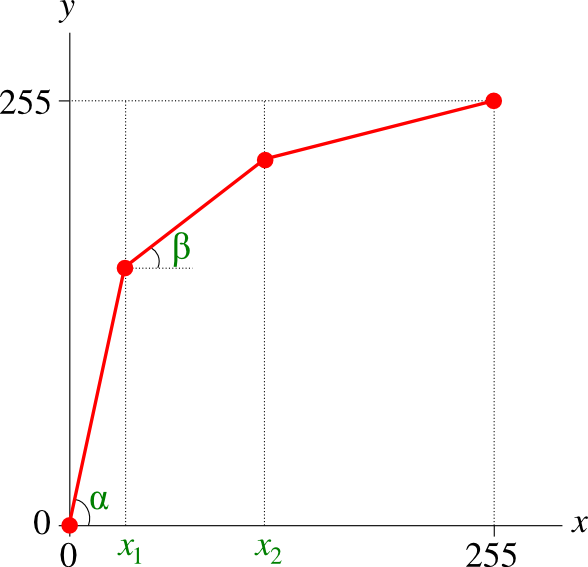

In [9]:
from PIL import Image
ang = Image.open('../figures/bc_angulos.png')
ang

Dicas:

- Determine *y1* e *y2* a partir de *alpha* e *beta*.
- Utilize a equação da reta, tendo dois pontos conhecidos *(xa,ya)* e *(xb,yb)*, para cada trecho de reta



# Resolução

Antes de iniciar, vamos escrever a implementação da funçaõ **compare_figs**, que irá plotar duas imagens lado a lado, para que seja possível fazer uma análise mais cuidadosa das difernças após a execução de algum algoritmo de processamento sobre a imagem:

In [10]:
def compare_figs(fig1,fig2, cmap1=None,cmap2=None):
    ar1 = np.array(fig1)
    ar2 = np.array(fig2)
    
    #exibição da primeira imagem
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(fig1,cmap1)
    plt.colorbar()
    
    #exibição da segundaimagem
    plt.subplot(1,2,2)
    plt.title("Alterada")
    plt.imshow(fig2,cmap2)
    plt.colorbar()
    
    plt.tight_layout()
    



Por praticidade, também vamos implementar a função **plot_hist**. Ela nos permitirá obter o plot de um histograma de uma imagem fornecendo apenas alguns parâmetros de entrada (a imagem, o número de *bins*, e os limites inferior e superior do eixo das abcissas):

In [11]:
#definição de função para plotar um histograma a partir de uma imagem qualquer:

def plot_hist(img,nbins,lo_lim,hi_lim,t):
    
    w = t/nbins
    h,bin_edges = np.histogram(img,nbins,(lo_lim,hi_lim))

    bin_centers = bin_edges[1:]-(w/2)

    plt.bar(bin_centers,h,width=w)

    return h

## Exercício 1

In [12]:
def h2stats(h):
    import numpy as np
    #import ia898.src as ia

    hn = 1.0*h/h.sum() # compute the normalized image histogram
    v = np.zeros(6) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4]  = -(hn[hn>0]*np.log(hn[hn>0])).sum() # entropy
    v[5]  = np.argmax(h) # mode
    return v

## Exercício 2

Vamos retomar a função **print_xadrez()** , que imprime na tela um quadriculado xadrez a partir de dimensões especificadas:

<class 'numpy.ndarray'>


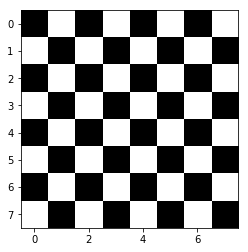

In [13]:
def print_xadrez(L=8,C=8,dimq=1):
    
    ar = np.zeros(L*C*(dimq**2)).reshape(L*dimq,C*dimq).astype('uint8')
    
    quad0 = np.zeros(dimq**2).reshape(dimq,dimq)
    quad1 = np.ones(dimq**2).reshape(dimq,dimq)
    small_chess = np.block([ [quad0,quad1],[quad1,quad0]])
    
    
    quo1 = L/dimq
    quo2 = C/dimq
        
    big_chess = np.tile(small_chess, (round(L/2),round(C/2)))

    print(type(big_chess))
    #plt.imshow(big_chess,'gray')
    
    return big_chess
    
plt.imshow(print_xadrez(),'gray')

Vamos obter o histograma para o tabuleiro de xadrez:

<class 'numpy.ndarray'>


<Container object of 100 artists>

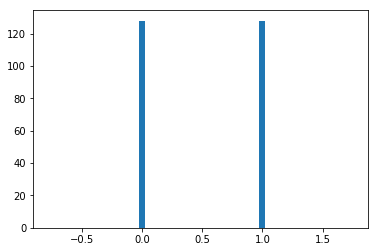

In [14]:
img = print_xadrez(8,8,2)

nbins = 100

h,bin_edges = np.histogram(img,nbins,(-0.75,1.75))
w=5/nbins
bin_centers = bin_edges[1:]-(w/2)

plt.bar(bin_centers,h,width=w)


Como esperado, a distribuição de valores se daria em apenas duas colunas: **preto (valor zero)**, e **branco (valor 1)**, e com a mesma frequência. Vamos agora aplicar uma transformação para essa figura, de modo que seja possível fazer com que as casas brancas se tornem pretas, e vice-versa.

De maneira geral, devemos analisar o numero de bits da imagem para obter o maior numero que pode ser representado neste intervalo, para em seguida subtrair o valor de cada pixel deste valor para obter a imagem invertida. Contudo, há também a possibilidade de se avaliar qual o valor máximo presente no array da imagem e fazer a subtração dos valores de cada pixel a partir dele. Para a imagem do tabuleiro de xadrez, isso não traz diferenças, visto que o valor máximo do array e o maior valor representpavel para aquela quantidade de bits são o mesmo.

<class 'numpy.ndarray'>


array([[ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.]])

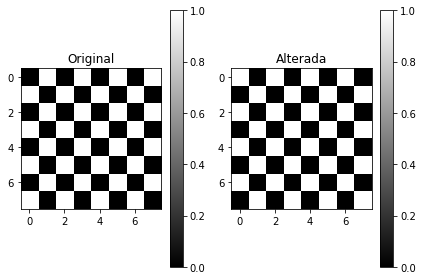

In [15]:
img0 = print_xadrez()

def inverte_cor(imagem,cmap1=None,cmap2=None):

    #exibição da primeira imagem - caso NÃO queira usar compare_figs()
    
    #plt.subplot(1,2,1)
    #plt.title("Imagem original")
    #plt.imshow(imagem,'gray')
    #plt.axis('off')
    #plt.colorbar()
    
    
    #realização das transformações
    T1 = np.array(imagem)
    #print("vetor original\n",T1)
    T2 = (np.max(T1)-T1)
    #print("vetor novo\n",T2)

    #exibição da segunda imagem - caso NÃO queira usar a função compare_figs()
    #plt.subplot(1,2,2)
    #plt.title("Imagem alterada")
    #plt.imshow(T2,'gray')
    #plt.axis('off')
    #plt.colorbar()
    
    compare_figs(imagem,T2,'gray','gray')
    
    return T2
    
inverte_cor(img0)

Para imagens coloridas, isso pode mudar, então faremos uma comparação entre a função  **inverte_cor** apresentada anteriormente e a nova implementação da função, **inverte_cor2**:

In [16]:
def inverte_cor2(imagem,cmap1=None,cmap2=None):

    #exibição da primeira imagem - caso NÃO queira usar compare_figs()
    
    #plt.subplot(1,2,1)
    #plt.title("Imagem original")
    #plt.imshow(imagem,'gray')
    #plt.axis('off')
    #plt.colorbar()
    
    
    #realização das transformações
    #vamos deixar a imagem como um inteiro de 8 bits 
    T1 = np.array(imagem).astype('uint8')
    #print("vetor original\n",T1)
    #valor maximo a ser representado: 255
    T2 = (255-T1)
    #print("vetor novo\n",T2)

    #exibição da segunda imagem - caso NÃO queira usar a função compare_figs()
    #plt.subplot(1,2,2)
    #plt.title("Imagem alterada")
    #plt.imshow(T2,'gray')
    #plt.axis('off')
    #plt.colorbar()
    
    compare_figs(imagem,T2,'gray','gray')
    
    return T2

In [17]:
img = Image.open('../data/boat.tif')
#img1 = np.array(img)

In [18]:
img_new = Image.open('../data/boat.tif')
#img2 = np.array(img_new)

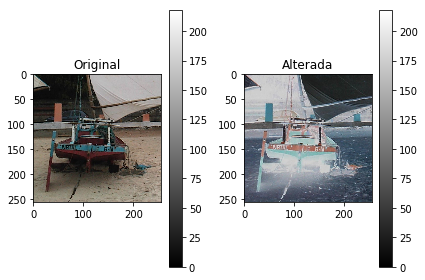

In [19]:
inverse_boat = inverte_cor(img)

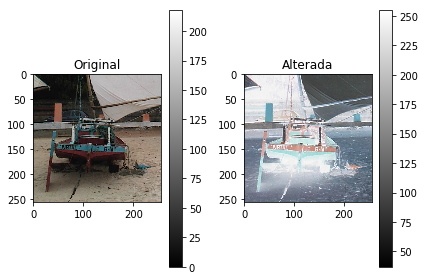

In [20]:
inverse_boat2 = inverte_cor2(img_new)

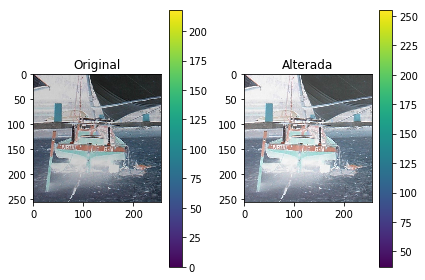

In [21]:
compare_figs(inverse_boat,inverse_boat2)
#original - usando valor maximo
#alterada - usando maior valor representavel

Comparando as imagens, notamos que a implementação utilizando o valor máximo deixa a imagem mais escura, enquanto a utilização do maior valor representável torna a imagem mais clara. Isso ocorre devido ao fato de que o *range* de valores é o mesmo para as duas figuras (para inteiros de 8 bits, por exemplo, em ambos os caso irá de 0 a 255), mas na imagem obtida a partir do valor máximo o array obtido não terá valores que ocuparão essas posições.

Vamos analisar também o histograma destas imagens:

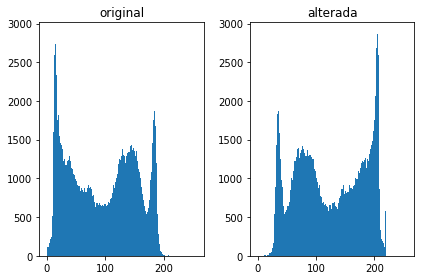

In [22]:


plt.subplot(1,2,1)
plt.title('original')
his1 = plot_hist(img,255,0,255,255)

plt.subplot(1,2,2)
plt.title('alterada')
his2 = plot_hist(inverse_boat,255,0,255,255)

plt.tight_layout()


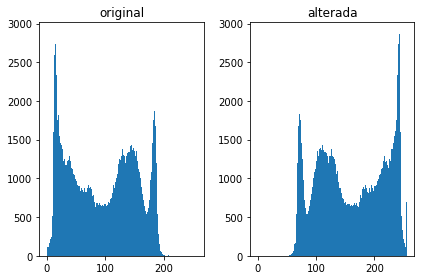

In [23]:

plt.subplot(1,2,1)
plt.title('original')
his3 = plot_hist(img_new,255,0,255,255)
#plt.subplots_adjust(right = '1')
plt.subplot(1,2,2)
plt.title('alterada')
his4 = plot_hist(inverse_boat2,255,0,255,255)

plt.tight_layout()


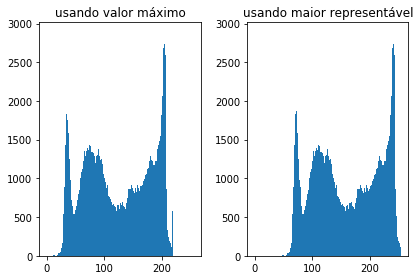

In [24]:

plt.subplot(1,2,1)
plt.title('usando valor máximo')
his5 = plot_hist(inverse_boat,255,0,255,255)
#plt.subplots_adjust(right = '1')
plt.subplot(1,2,2)
plt.title('usando maior representável')
his6 = plot_hist(inverse_boat2,255,0,255,255)

plt.tight_layout()


Podemos ver um formato semelhante entre os histogramas. Contudo, há um deslocamento no de uso do maior valor representável por ele alcançar números mais próximos de 255 , enquanto o de valor máximo é truncado.

Para uma implementação mais genérica e que independe de se conhecer o tipo de dado (e o número de bits que ele possui), o uso do valor máximo é aceitável e de fácil implementação. Quando se conhece o tipo de dado da imagem de entrada (float, unsigned int, etc), o maior valor representavel pode ser uma melhor opção. Na nossa implementação, assumimos que os dados teriam o formato unsigned int. Isso pode trazer problemas para dados com características diferentes, como veremos a seguir:

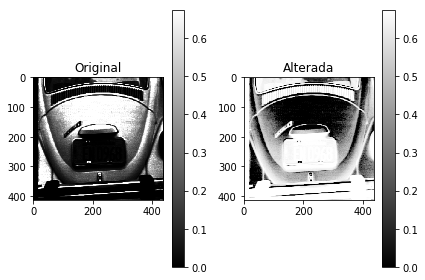

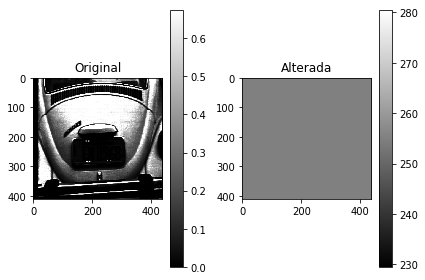

In [25]:
f = mpimg.imread('../figures/fusca.png')  
a1 = inverte_cor(f)
plt.figure()
a2 = inverte_cor2(f)

Notando as figuras acima, vimos que a implementação de maior valor representável(ajustado em 255) não produziu o efeito esperado. Vamos observar o histograma dessa imagem:

[ 0.          0.06745098  0.13490196  0.20235295  0.26980393  0.33725491
  0.40470589  0.47215688  0.53960786  0.60705884  0.67450982]


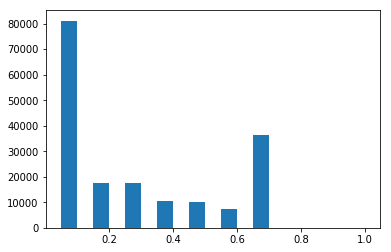

In [26]:
h =plot_hist(f,10,0,1,0.5)
h, bin_edges = np.histogram(f)
print(bin_edges)

Podemos notar que a maior frequencia dos valores é próxima de zero. Além disso, os demais valores também estão distribuidos entre 0 e 1. Fazendo a operação adotada na função **( 255 - (valor do pixel) )**, teremos como resultado uma array de valores próximos (ou, se o arredondamento foi feito, iguais) a 255,  o que justifica o aparecimento de uma imagem cinza.

Vamos criar uma função **normalize_img()**, para efetuar a normalização linear de uma determinada imagem. O conceito utilizado para a implementação desta função pode ser obtido em: https://en.wikipedia.org/wiki/Normalization_(image_processing)

In [30]:
def normalize_img(f):
        f_ar = np.array(f)
        f_ar.astype('uint8')
        maximum = np.max(f)
        minimum = np.min(f)
        
        new_max = 255
        new_min = 0
        
        norm_img = (f - minimum ) * ((new_max - new_min)/(maximum-minimum)) +new_min
        
        return norm_img

In [28]:
#função identidade, para ser usada em outras transformações
def T_eye():
    
    return np.arange(256).astype('uint8')


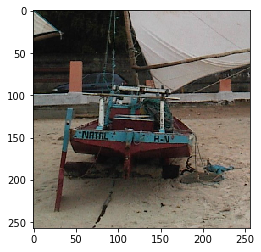

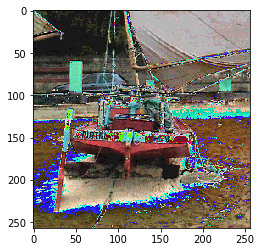

In [32]:
def quant(f):
    
    return normalize_img(f//10)

    
teste = Image.open('../data/boat.tif')  
teste_array = np.array(teste)
teste_quant = quant(teste_array)

plt.imshow(teste_array,'gray')
plt.figure()
plt.imshow(teste_quant,'gray')

## Exercício 3

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
f = mpimg.imread('../figures/cookies.pgm')  
plt.imshow(f,cmap='gray')

Para resolver este exercício, vamos obter primeiramente o histograma da imagem:

In [ ]:
#print(f)
h, bin_edges = np.histogram(f)
print(h)
print(bin_edges)

h = plot_hist(f,10,16,205,150)


Neste histograma, observamos dois picos, referentes ao fundo escuro e as figuras das bolachas (mais acinzentado). Em seguida, vamos definir a função **threshold_img**, que realiza a filtragem da

In [ ]:
def threshold_img(f,lim):
    f1 = (f>lim).astype('uint8')
    print(f1)
    f1 = f1 + 0.001 #evitar divisões por zero na hora de normalizar
 
    
    
    tn = normalize_img(f1)
    
    plt.imshow(tn,'gray')
    plt.colorbar()
    

threshold_img(f,100)


## Exercício 4

O primeiro passo a ser tomado para tentar visualizar a placa do carro neste exercício é a extração de informações do histograma da imagem. Assim, podemos obter uma ideia melhor da sua distribuição dos tons de cinza:

In [ ]:
fusca = mpimg.imread('../figures/fusca.png')  
plt.imshow(fusca,cmap='gray')
h,be = np.histogram(fusca)

#é interessante fazer o print dos arrays
#observando os valores deles é mais facil escolher os parâmetros de print_hist()
print(h)
print("\n",be)

Assim, faremos o a exibição do histograma da imagem original:

In [ ]:
plot_hist(fusca,10,0,0.7,0.5)

Como já vimos no exercício anterior, a inversão de cores nesta imagem não é suficiente para que possamos visualizar a placa do carro.

In [ ]:
a1 = inverte_cor(fusca,'gray','gray')
plt.figure()
a2 = inverte_cor2(fusca,'gray','gray')

Para tentar ver de maneira mais nítida a placa do carro, vamos tentar fazer uso da *correção gama*. Ela é uma transformação baseada em uma lei de potência da forma

\begin{equation*}
s  = c ^{r^\gamma}
\end{equation*}

sendo c e gama são constantes positivas. Com o aumento de gama, uma faixa estreita de valores de entradas escuras é mapeado em uma faixa maior de valores de saídas. 

*(Fonte: Digital Image Processing - Rafael C. Gonzalez, Richard E. Woods)*


O Código a seguir ilustra a implementação dessa função. O valor de gama foi variado até que fosse obtido um resultado satisfatório para visualizar a placa:

In [ ]:
    
    #exibição da imagem original caso não queira usar compare_figs()
    #plt.subplot(1,2,1)
    #plt.title("Imagem original")
    #plt.imshow(f,'gray')
    #plt.axis('off')
    #plt.colorbar()
    
    #realização das transformações
    img_float = fusca.astype('float')
    #print("vetor original\n",T1)
    aux1 = np.max(img_float)
    aux2 = np.min(img_float)
    
    T2 = (img_float + 0.01)/aux1 #somamos 0.01 para evitar divisoes por zero 
    gamma = 0.07 #fixação do valor de gama
    
    #as proximas três linhas de codigo referem-se a expressao de s mencionada acima.
    #usamos a exponencial do logaritmo para representar o expoente.
    T3 = np.log(T2)*gamma
    T4 = np.exp(T3)*255
    T5 = T4.astype('uint8') #passar para inteiro de 8 bits
     
    #print(T1)
    #print("vetor novo\n",T2)
    
    
    #exibição da segunda imagem caso não queira usar compare_figs()
    #plt.subplot(1,2,2)
    #plt.title("Imagem alterada")
    #plt.imshow(T5,'gray')
    #plt.axis('off')
    #plt.colorbar()
    
    compare_figs(fusca,T5,'gray','gray')                
    
    a,b = np.histogram(fusca)
    print("valores:\n",a)
    print("bin edges:\n",b)
    
    a,b = np.histogram(T5)
    print("valores:\n",a)
    print("bin edges:\n",b)
    plt.figure()
    
    plt.subplot(1,2,1)
    plot_hist(fusca,100,0,0.7,5)
    
    plt.subplot(1,2,2)
    plot_hist(T5,10,180,255,20)
    plt.tight_layout()

## Exercício 5

In [ ]:
from PIL import Image
ang = Image.open('../figures/bc_angulos.png')

ang

In [ ]:
x = np.arange(256)
print(x)

In [ ]:
#informações do gráfico:

# y1  = alpha * x1 => alpha = y1/x1
# 255 - y2 = gama* (255-x2)
# y2 -  y1 = beta * (x2-x1)

In [ ]:
ang_ar = np.array(ang)
print(ang_ar)

In [ ]:
def angulos(x1,x2):
    x = np.arange(255)
    if(x >0) and (x<=x1):
        y = y[x1]/x1 
        
    if(x >= x1) and (x<=x2):
        y = y[x]
        
    if(x >= x2) and (x<= 255):